# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Цель исследования: изучить данные и найти особенности и зависимости, существующие на рынке недвижимости и влияющие на ценообразование.

Ход исследования:
1. изучение общей информации;
2. базовая предобработка данных: 
- подсчет пропущенных значений, 
- проверка и удаление явных дубликатов,
- изменение типов и названий колонок;
3. дальнейшая предобработка данных:
- заполнение пропущенных значений,
- поиск и удаление аномалий;
4. добавление новых значений и колонок:
- подсчет стоимости квадратного метра,
- выделение в отдельную колонку даты (год, месяц, день недели);
5. исследовательский анализ данных и поиск закономерностей, влияющих на ценообразование;
6. изучение времени продажи квартир;
7. поиск населённых пунктов с самой высокой и низкой стоимостью квадратного метра;
8. поиск квартир в Санкт-Петербурге и вычисление средней цены каждого километра;
9. общий вывод.

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В датасете 23699 строки. 

Столбцу cityCenters_nearest необходимо изменить название: перевести из стиля camel case в snake case.

Некоторым столбцам нужно изменить тип данных:
- floors_total - int64,
- is_apartment - bool (согласно описанию данных),
- balcony - int64.

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


При первом взгляде на значения min и max в разных колонках заметны выбросы:
- total_area (12 и 900 м кв. - слишком мало и слишком много);
- rooms (0 и 19 комнат);
- ceiling_height (1 и 100 м);
- living_area (2 и 409.7 м кв.);
- kitchen_area (1.3 и 112 м кв.).

In [5]:
# Изменить типы колонкам is_apartment, balcony, floors_total, days_exposition.

data['is_apartment'] = data['is_apartment'].astype(bool)
data.query('balcony.isna() == False')['balcony'].astype('int64')
data.query('floors_total.isna() == False')['floors_total'].astype('int64')
data.query('days_exposition.isna() == False')['days_exposition'].astype('int64')

1         81
2        558
3        424
4        121
5         55
        ... 
23691    519
23692    413
23693    239
23695     45
23697    602
Name: days_exposition, Length: 20518, dtype: int64

In [6]:
# Изменим имя колонке cityCenters_nearest.

data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)

In [7]:
# Округлим значение колонки 'last_price' до целого

data['last_price'] = data['last_price'].round(0)

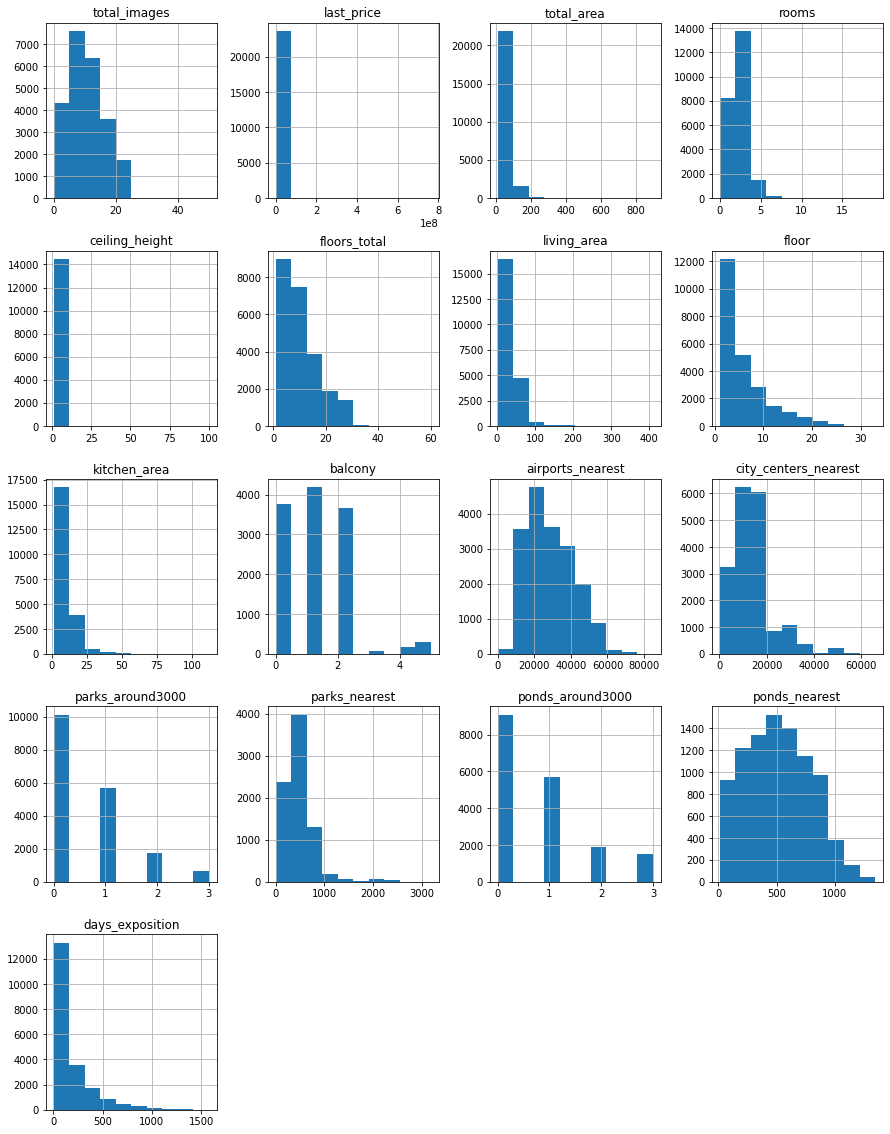

In [8]:
# Построим общую гистограмму для всех столбцов таблицы.

data.hist(figsize=(15, 20));

Как и предположили выше, в колонках total_area, rooms, ceiling_height, living_area и kitchen_area заметны выбросы.

Длинный правый хвост гистограммы days_exposition нельзя однозначно классифицировать как выброс. Он мог появиться по нескольким причинам:
1. недвижимость могут еще не продать (неудачное расположение, завышенная цена, проблем с документами и/или собственниками и пр.);
2. квартиру продали, но объявление не закрыли.

### Предобработка данных

In [9]:
# Посчитаем количество пропущенных значений в data.

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [10]:
# Проверим колличество пропусков в процентах.

pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,0.000000


Пропусков нет в 9 колонках: 
total_images, last_price, total_area, first_day_exposition, rooms, floor, is_apartment, studio, open_plan.

В колонках parks_nearest и ponds_nearest более 50% пропусков: пропусков слишком много, не получится заполнить их логически, необходимо заполнить дополнительные данные.

Данные в колонках airports_nearest, city_centers_nearest, parks_around3000, parks_nearest, ponds_around3000 и ponds_nearest возможно заполнить медианным значением только для небольших населенных пунктов. Для крупных (таких как Санкт-Петербург) такой способ заполнения не подойдет, необходимо запросить точное местоположение объекта.  

In [75]:
# Проведем подсчет и удаление явных дубликатов

print(data.duplicated().sum())
data = data.drop_duplicates()

0


Если продавец не указал число балконов, то, скорее всего, в его квартире их нет.

In [12]:
# Заполним пропущенные значения колонки 'balcony' 0.

data['balcony'] = data['balcony'].fillna(0)

In [13]:
# Посчитаем количество уникальных значений колонки 'locality_name'.

data['locality_name'].value_counts()

Санкт-Петербург           15721
посёлок Мурино              522
посёлок Шушары              440
Всеволожск                  398
Пушкин                      369
                          ...  
поселок Кирпичное             1
посёлок Левашово              1
деревня Котлы                 1
посёлок Высокоключевой        1
деревня Тойворово             1
Name: locality_name, Length: 364, dtype: int64

In [14]:
# и выведем их на экран.

data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Среди значений колонки 'locality_name' были замечены два вида неявных дубликатов:
1. "очевидные" неявные дубликаты - замены букв Ё на Е (например, "поселок Тельмана" и "посёлок Тельмана");
2. и "неочевидные" неявные дубликаты - перестановка или отсутсвие слов в названии ("городской посёлок Павлово" и "посёлок городского типа Павлово").

Было несколько вариантов избавления от этих пропусков:
1. долгое - провести быструю замену (replace) слов "поселок" на "посёлок" и вручную найди и заменить названия "неочевидных" дубликатов;
2. быстрое - вынести в отдельную колонку названия населенных пунктов без указания его типа.
Я решила остановиться на втором варианте. Используя его, оставалась вероятность, что разные типы населенных пунктов имеют общее название, данные, относящиеся к разным нас. пунктам "сольются" и не будут точными, но учитывая общее количество данных, этой вероятности было решено пренебречь.

Для заполнения пропусков был выбран следующий алгоритм:
1. 'locality_name' - привести к единому стилю названия населенных пунктов, удалить строки с пропусками в колонке (49 строк), т.к. заполнить вручную их не удастся;
2. 'ceiling_height' - найди и изменить выбивающиеся значения в колонке, удалить выбросы, заполнить пропуски в колонке медианным значением, сгруппированным по названию населенного пункта;
3. 'kitchen_area' и 'living_area' - заполнить пропуски в колонке медианным значением, сгруппированным по общей площади ('total_area);

4. борьба с выбросами.

In [15]:
# Веделяем название населенного пункта в отдельную колонку.

data['locality_name'] = data['locality_name'].str.replace('поселок', 'посёлок')
data['locality_name_strip'] = data['locality_name'] \
    .str.replace('посёлок', '') \
    .str.replace('село', '') \
    .str.replace('деревня', '') \
    .str.replace('городского типа', '') \
    .str.replace('городской', '') \
    .str.replace('садовое товарищество', '') \
    .str.replace('садоводческое некоммерческое товарищество', '')

In [16]:
# Удаляем пропущенные значения в колонке 'locality_name'.

data.dropna(subset=['locality_name'], inplace=True)

In [17]:
# Выведем уникальные значения колонки 'ceiling_height'.

data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [18]:
# Проведем замену очевидных аномалий, которые могли быть вызваны человеческим фактором.

data.loc[data['ceiling_height']==25.0, 'ceiling_height'] = 2.5
data.loc[data['ceiling_height']==32.0, 'ceiling_height'] = 3.2

data.loc[data['ceiling_height']==27.0, 'ceiling_height'] = 2.7
data.loc[data['ceiling_height']==24.0, 'ceiling_height'] = 2.4

data.loc[data['ceiling_height']==26.0, 'ceiling_height'] = 2.6
data.loc[data['ceiling_height']==22.6, 'ceiling_height'] = 2.26

data.loc[data['ceiling_height']==20.0, 'ceiling_height'] = 2.0
data.loc[data['ceiling_height']==27.5, 'ceiling_height'] = 2.75

In [19]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
         3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,   3.34,
      

In [20]:
# Заполним пропущенные значения колонки 'ceiling_height', сгруппированным по колонке 'locality_name_strip'.

ceiling_height_median = data.groupby('locality_name_strip')['ceiling_height'].transform('median')
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)

In [21]:
# Заполним пропущенные значения колонки 'kitchen_area', сгруппированным по колонке 'total_area'.

kitchen_area_median = data.groupby('total_area')['kitchen_area'].transform('median')
data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_area_median)

In [22]:
# Заполним пропущенные значения колонки 'living_area', сгруппированным по колонке 'total_area'.

living_area_median = data.groupby('total_area')['living_area'].transform('median')
data['living_area'] = data['living_area'].fillna(living_area_median)

Мы предполагаем, что есть прямая взаимосвязь между общей площадью и площадью кухни. Чем больше общая площадь, тем больше жилая площадь и тем больше площадь кухни. И наоборот.

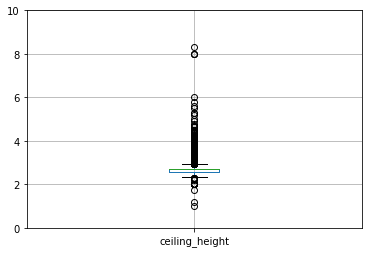

In [23]:
# Выведем диаграму размаха по колонке 'ceiling_height'. 
# Ограничим высоту по оси y до 10 метров для удобства. Помним о том, что есть выбросы более 10 метров.

plt.ylim(0, 10)
data.boxplot(column='ceiling_height');

Минимальное значение для коноки 'ceiling_height' - 1.0.
Медианное значение - 2.65.
Максимальное значение - 100.0.

Сегодня минимальной нормой в России считается высота потолка 2,4 метра. Предпологаем, что в элитной недвижимости или квартирах из старых районов Санкт-Петербурга высота потолков может доходить до 5 метров.
Эти значения мы возьмем в качестве ограничений для среза.

In [24]:
data = data.query('2.4 < ceiling_height < 5')

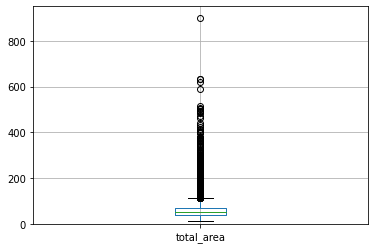

In [25]:
# Выведем диаграму размаха по колонке 'total_area'. 
# Ограничим высоту по оси y до 10 метров для удобства. Помним о том, что есть выбросы более 10 метров.

plt.ylim(0, 950)
data.boxplot(column='total_area');

Минимальное значение для коноки 'total_area' - 12.0. Медианное значение - 53.3. Максимальное значение - 900.0.

Площадь однокомнатной квартиры ~ 30-40 квадратных метров. В домах современной постройки могут быть заложены однокомнатные квартиры или студии площадь ~25 квадратных метров. Возможность появляения в продаже мини-квартир (менее 25 метров) возможна, но маловероятно. Эти наблюдения подтверждает сайт по продажи недвижимости Циан.
Согласно Циан, квартиры площадью более 250 квадратных метров тоже не редкость для продажи в Санкт-Петербурге - это элитная недвижимость и бывшие питерские коммуналки.
Взглянув внимательнее на график boxplot было решено взять в качестве ограничений для среза значения 25 и 400 квадратных метров.

In [26]:
data = data.query('25 < total_area < 400')

In [27]:
data['rooms'].describe()

count    23232.000000
mean         2.079890
std          1.061894
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Взгнянем подробнее на обновленную статистику. Максимальное значение изменилось из-за предыдущих срезов с 19 на 16 комнат. Минимальное значение - 0, что является явным выбросом.
Максимальное значение нельзя считать однозначным выбросом. Воспользовавшись поиском, мы находим статью на сайте lenta.ru от 15 декабря 2018 под заголовком "В Петербурге нашли квартиру из 58 комнат". Учитывая особенности застройки Санкт-Петербурга и окрестностей, мы не можем исключать возможность, что 16-комнатная квартира - это бывшее общежитие. Воспользуемся срезом для проверки

In [28]:
data.query('rooms > 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_strip
648,3,17500000.0,183.7,2018-07-01T00:00:00,11,3.40,7.0,138.8,7,True,...,0.0,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN,Санкт-Петербург
866,5,25000000.0,363.0,2017-12-23T00:00:00,14,3.16,5.0,222.0,4,True,...,0.0,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0,Санкт-Петербург
9688,8,33000000.0,194.1,2017-02-07T00:00:00,11,3.43,5.0,129.0,2,True,...,0.0,Санкт-Петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0,Санкт-Петербург
14498,6,32250000.0,374.6,2018-06-09T00:00:00,19,2.70,5.0,264.5,2,True,...,0.0,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0,Санкт-Петербург
18848,6,28500000.0,270.0,2015-03-02T00:00:00,16,3.00,4.0,180.0,4,True,...,1.0,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0,Санкт-Петербург
20829,6,28659000.0,245.4,2016-03-31T00:00:00,14,2.70,4.0,168.3,2,True,...,0.0,Санкт-Петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95.0,Санкт-Петербург


Оставшиеся строки выглядят адекватно - большая общая площадь и жилая площадь.

In [29]:
# Выполним срез по колонке 'rooms'

data = data.query('rooms >= 1')

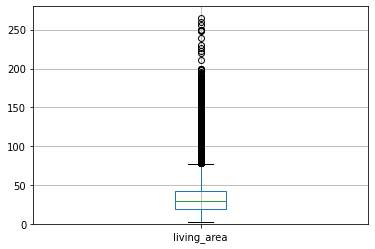

In [30]:
plt.ylim(0, 280)
data.boxplot(column='living_area');

In [31]:
data['living_area'].describe()

count    22989.000000
mean        34.522989
std         20.617085
min          2.000000
25%         19.000000
50%         30.100000
75%         42.500000
max        264.500000
Name: living_area, dtype: float64

Согласно нормативным документам, соотношение жилой площади к общей составляет 0.5-0.7. На предыдущих шагах мы выбрали минимум общей площади 25 квадратных метров, следовательно минимум жилой площади - 12.5-17.5 квадратных метров. Помня о наличии в датафрейме квартир до 400 квадратных метров, максимум - 200-280 квадратных метров.
Взглянув внимательнее на график boxplot было решено взять в качестве ограничений для среза значения 12.5 и 200 квадратных метров жилой площади.

In [32]:
# Выполним срез по колонке 'living_area'

data = data.query('12.5 <= living_area <= 200')

In [33]:
data['kitchen_area'].describe()

count    22766.000000
mean        10.423496
std          5.563636
min          1.300000
25%          7.000000
50%          9.000000
75%         11.800000
max        107.000000
Name: kitchen_area, dtype: float64

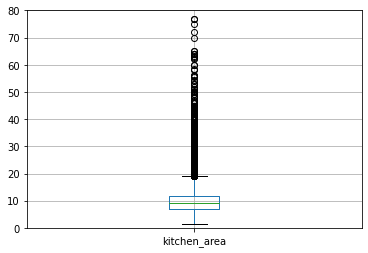

In [34]:
plt.ylim(0, 80)
data.boxplot(column='kitchen_area');

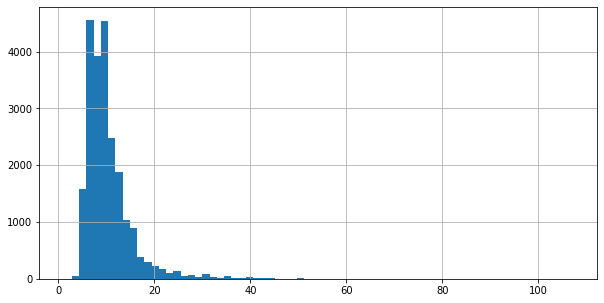

In [35]:
data['kitchen_area'].hist(bins = 70, figsize=(10,5));

В качестве ограничений для среза были выбраны значения 5 (минимальный размер кухни-нихни согласно нормативным документам) и 38 метров (данные гистограммы и графика boxplot).

In [36]:
data = data.query('5<=kitchen_area<=38')

In [37]:
# Проверка количества строк, оставшихся после удаления выбросов

data.shape[0]

22531

### Посчитайте и добавьте в таблицу новые столбцы

In [38]:
data['price_per_square_meter'] = (data['last_price'] / data['total_area']).round(2)

In [39]:
# Первоначальный вариант:
# data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [40]:
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year
data['day_of_week_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).day_of_week

In [41]:
data['month_exposition'] = data['first_day_exposition'].astype('datetime64[M]')

In [42]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_strip,price_per_square_meter,year_exposition,day_of_week_exposition,month_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,True,...,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург,120370.37,2019,3,2019-03-01
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.63,11.0,18.6,1,True,...,0.0,NaN,0.0,NaN,81.0,Шушары,82920.79,2018,1,2018-12-01
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.70,5.0,34.3,4,True,...,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,92785.71,2015,3,2015-08-01
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.70,14.0,95.0,9,True,...,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург,408176.10,2015,4,2015-07-01
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,2.65,12.0,14.4,5,True,...,NaN,NaN,NaN,NaN,55.0,Янино-1,95065.79,2018,0,2018-09-01


In [43]:
def apartment_floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor==1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    else:
        return 'другой'
    
data['apartment_floor_type'] = data.apply(apartment_floor_type, axis=1)

In [44]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)

In [45]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_name_strip,price_per_square_meter,year_exposition,day_of_week_exposition,month_exposition,apartment_floor_type,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,True,...,2.0,755.0,NaN,Санкт-Петербург,120370.37,2019,3,2019-03-01,другой,16.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.63,11.0,18.6,1,True,...,0.0,NaN,81.0,Шушары,82920.79,2018,1,2018-12-01,первый,19.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.70,5.0,34.3,4,True,...,2.0,574.0,558.0,Санкт-Петербург,92785.71,2015,3,2015-08-01,другой,14.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.70,14.0,95.0,9,True,...,3.0,234.0,424.0,Санкт-Петербург,408176.10,2015,4,2015-07-01,другой,7.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,2.65,12.0,14.4,5,True,...,NaN,NaN,55.0,Янино-1,95065.79,2018,0,2018-09-01,другой,NaN


### Проведите исследовательский анализ данных

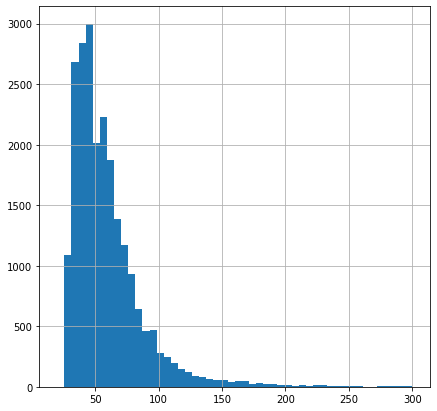

In [46]:
data['total_area'].hist(figsize=(7, 7), bins=50, range=(20,300));

Основная масса квартир в продаже площадью до ~60 квадратных метров.

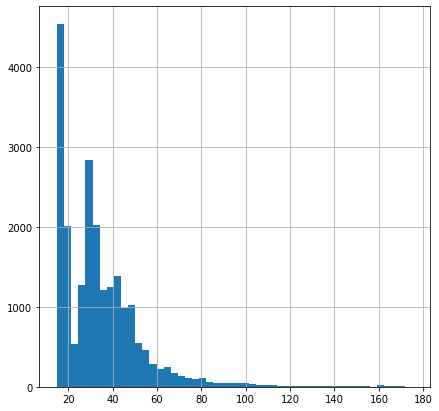

In [47]:
data['living_area'].hist(figsize=(7, 7), bins=50, range=(15,175));

Мы наблюдает спад на графике жилой площади на уровне ~40 квадратных метров. Это соотноситься с предположением о соотношение жилой площади к общей и предыдущим графиком (графиком общей площади). 

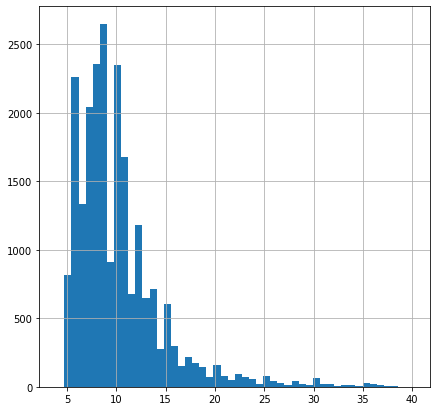

In [48]:
data['kitchen_area'].hist(figsize=(7, 7), bins=50, range=(4,40));

Больше всего кухонь размеров ~7 квадратных метров. Начиная с 10 квадратных метров мы видим спад. Выше мы отмечали что есть взаимосвязь между жилой, общей и площадью кухни. Следовательно, чем больше общая площадь, тем меньше таких квартир в продаже, тем меньше кухонь с площадью более 12 квадратных метров.

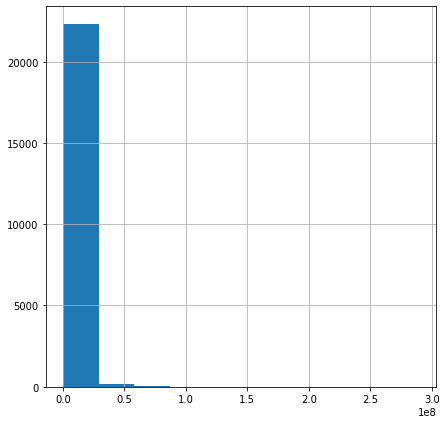

In [49]:
data['last_price'].hist(figsize=(7, 7));

Скажу честно, я затрудняюсь как-либо интерпритировать данный график. Вомзожно, для цены нужно было выбрать другой график, более наглядный.

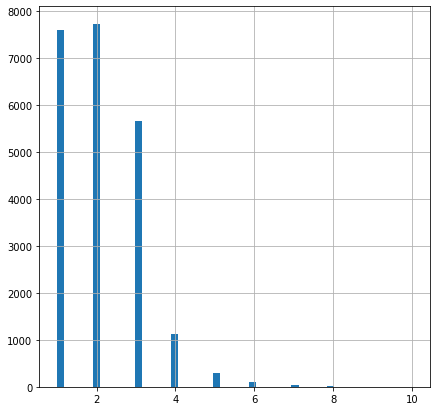

In [50]:
data['rooms'].hist(figsize=(7, 7), bins=50, range=(1,10));

Одно-, двух- и трехкомнатных квартир продают больше всего.

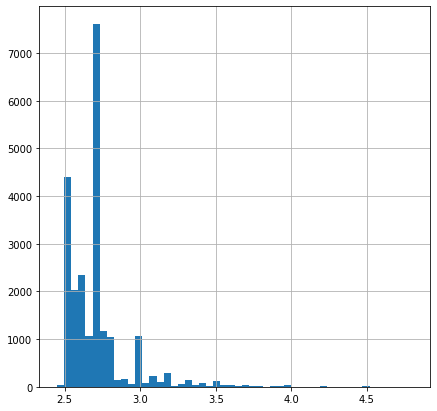

In [51]:
data['ceiling_height'].hist(figsize=(7, 7), bins=50);

Большая часть квартир по высоте потолка лежит в диапазоне от 2.5 (стандартная высота потолка) до ~2.7 м.

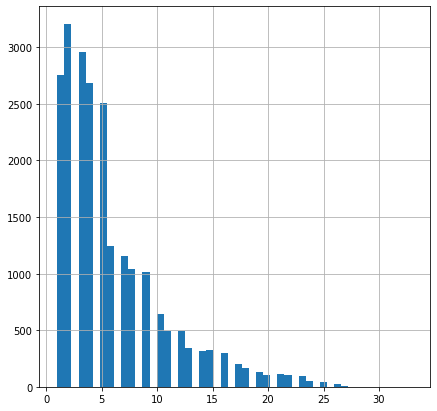

In [52]:
data['floor'].hist(figsize=(7, 7), bins=50);

Большая часть Санкт-Петербурга - малоэтажная и среднеэтажная застройка (до 9 этажей). Подавляющее большинство - пятиэтажные дома и ниже (может быть связано с тем, что в датафрейм были включены данные не только по городам, но и более мелким населенным пунктам из ленинградской области).

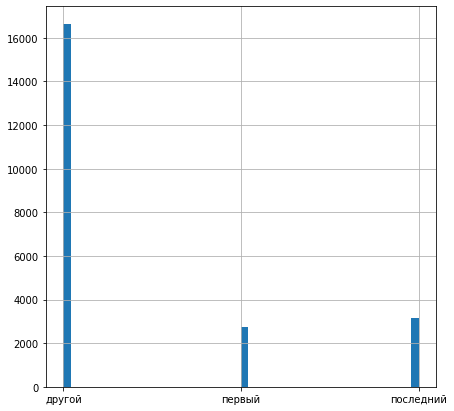

In [53]:
data['apartment_floor_type'].hist(figsize=(7, 7), bins=50);

Жители санкт-петербурга неохотно расстаются с жильем на первых и последних этажах, практически все объявления о продаже квартир - не на первых и не на последних этажах.

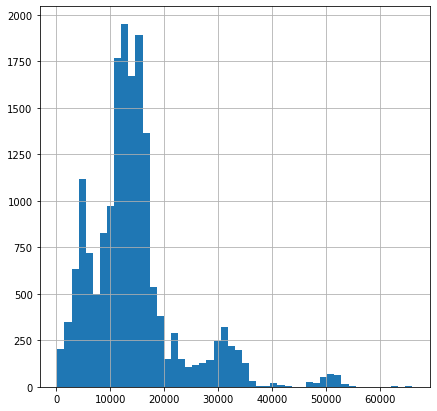

In [54]:
data['city_centers_nearest'].hist(figsize=(7, 7), bins=50);

Большая часть недвижимости находится далеко от центра города (от 10 до 17 км).

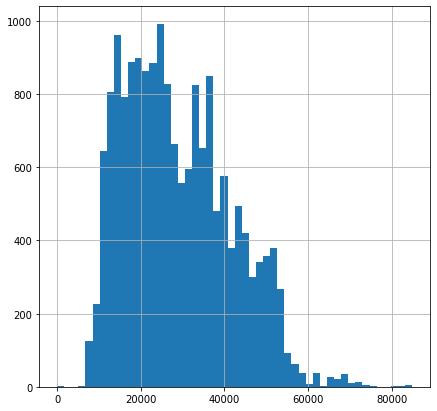

In [55]:
data['airports_nearest'].hist(figsize=(7, 7), bins=50);

Даже с учетом незаполненных на предыдущих этапов пропусков из колонки 'airports_nearest' мы видим, что большая часть квартир находится на расстоянии от аэропорта.

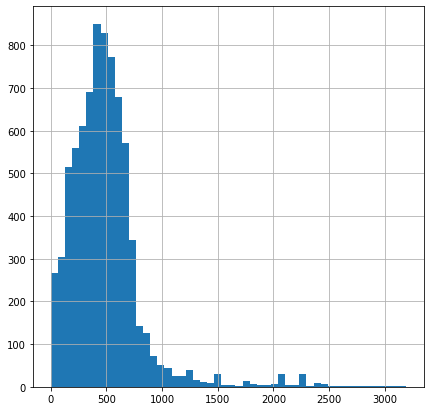

In [56]:
data['parks_nearest'].hist(figsize=(7, 7), bins=50);

Даже с учетом незаполненных на предыдущих этапов пропусков из колонки 'parks_nearest' мы видим, что большая часть квартир находится в шаговой досутпности от парков. Это может быть связано с наличием в Спб большого количество парков и зеленых зон.

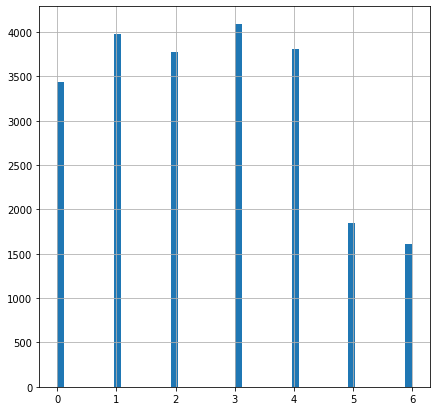

In [57]:
data['day_of_week_exposition'].hist(figsize=(7, 7), bins=50);

В будние дни размещают болше объявлений, чем в выходные. Во вторник и четверг объявлений размещено больше, чем в остальные бидние дни.

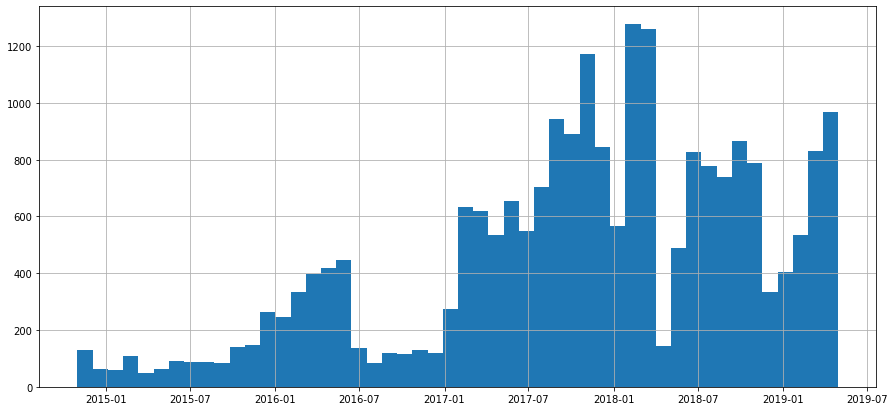

In [58]:
data['month_exposition'].hist(figsize=(15, 7), bins=50);

Мы наблюдаем волнообразный рост продаж недвижимости в течение года: резкий рост и высокое удержание в холодные месяцы (февраль и март), резкий спад к маю (возможно, на это влияют майские праздники: у потенциальных продавцов появляются другие занятия).
Далее мы видим постепенный рост к ноябрю и в декабре - снова провал (приближающийся новый год?).

### Изучите, как быстро продавались квартиры

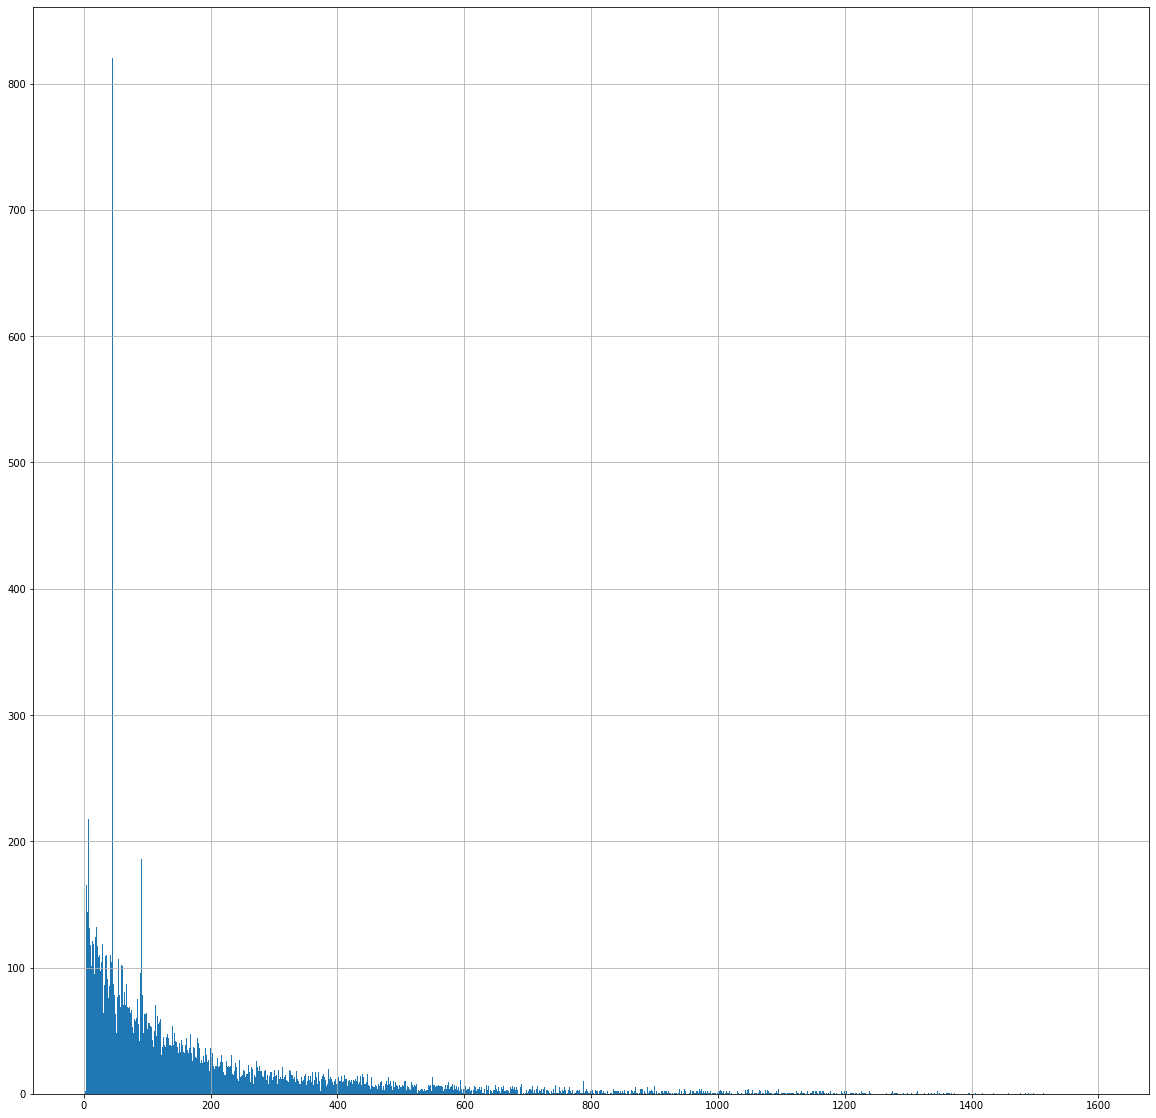

In [59]:
data['days_exposition'].hist(figsize=(20, 20), bins=1600, range=(0,1600));

Мы видим постепенное уменьшение количества продаж. Основная масса и выбросы наблюдаются на участке 0-200. 

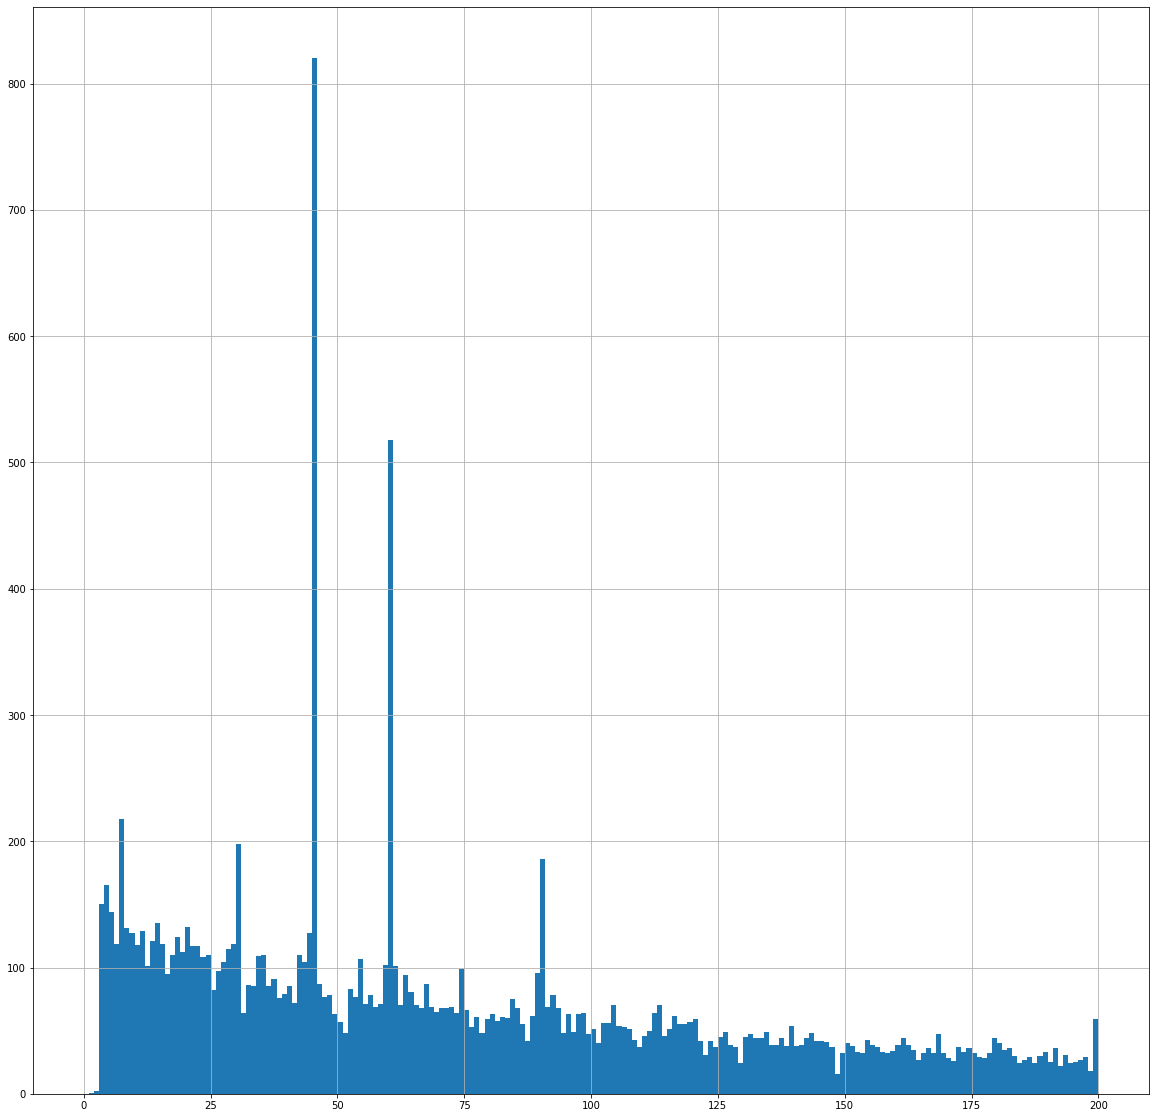

In [60]:
data['days_exposition'].hist(figsize=(20, 20), bins=200, range=(0,200));

Мы наблюдаем несколько аномально выскоких значений на промежутке 0-100.

In [61]:
# Гистограммы с постепенным уменьшение range
#data['days_exposition'].hist(figsize=(20, 20), bins=100, range=(0,100));
#data['days_exposition'].hist(figsize=(20, 20), bins=90, range=(0,90));
#data['days_exposition'].hist(figsize=(20, 20), bins=80, range=(0,80));
#data['days_exposition'].hist(figsize=(20, 20), bins=70, range=(0,70));

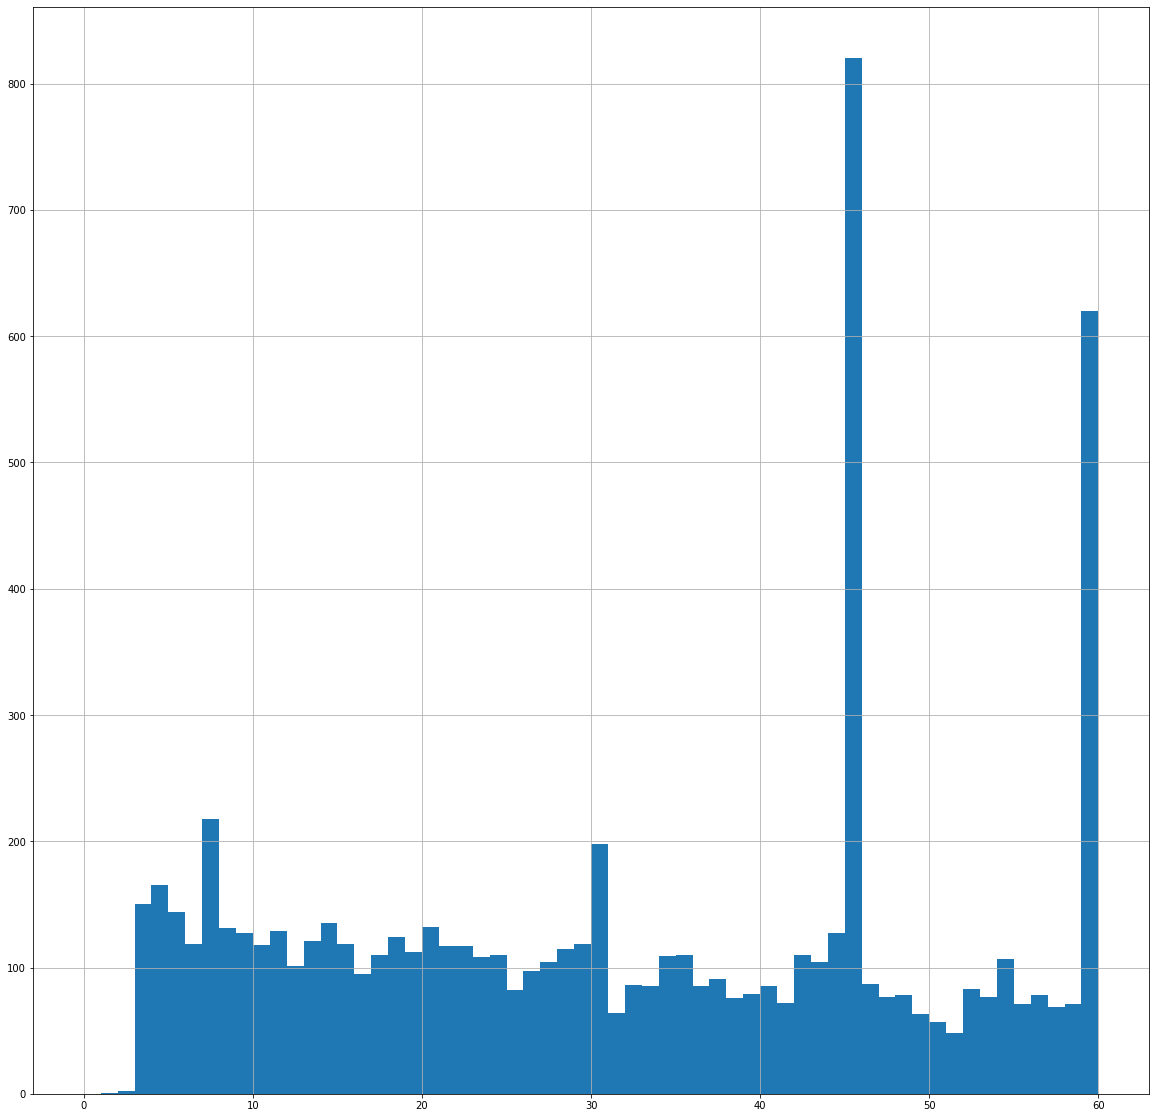

In [62]:
data['days_exposition'].hist(figsize=(20, 20), bins=60, range=(0,60));

Аномалии на промежутке 0-20, 20-40 и 80-100 вполне можно объяснить успешными продажами.
Два наблюдается на промежутке 40-60. Если уменьшить range до 60 (постепенно в несколько иттераций), то мы увидим что пики попадают на отметки 30, 45, 60. 

Необходимо уточнить, может быть приложение яндекс.недвижимость выдает оповещения о скором закрытие объявления раз в 15 дней и продавцы, понимая, что продали и не закрыли объявление, спешат его закрыть.

In [63]:
days_exposition_mean = data['days_exposition'].mean()
print(days_exposition_mean)

181.76850902379


In [64]:
days_exposition_median = data['days_exposition'].median()
print(days_exposition_median)

96.0


В качестве ответа на вопрос "сколько времени обычно занимает продажа" мы можем взять медианное значение колонки 'days_exposition' - 96 дней: половина продаж осуществляется за меньшее время, половина - за большее. Если воспользоваться гистограммой по колонке 'month_exposition', то можно понять что есть сезонность продаж (постепенный рост продаж в мае-августе). Вернемся к гистограмме по колонке 'days_exposition'. Мы можем предположить, что быстрая продажа - продажа менее чем за два месяца в сезон продаж (январь-февраль) - ~50 дней-60 дней. А долгая - более ~180 дней (примерно пять месяцев, что может совпасть с периодом с мая по сентябрь).

### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

In [80]:
# Объединим интересующие нас колонки в таблицу data_corr

data_corr = data[['locality_name_strip', 'last_price', 'rooms', 'total_area', 'living_area', \
                  'kitchen_area', 'floor', 'apartment_floor_type', 'city_centers_nearest_km', \
                  'month_exposition', 'day_of_week_exposition', 'year_exposition']]

In [66]:
# Вычислим матрицу корреляций.

data_corr.corr()

,last_price,rooms,total_area,living_area,kitchen_area,floor,city_centers_nearest_km,day_of_week_exposition
last_price,1.000000,0.416694,0.697274,0.626702,0.503045,0.033795,-0.275524,-0.009850
rooms,0.416694,1.000000,0.788597,0.859986,0.261118,-0.149801,-0.183735,-0.008257
total_area,0.697274,0.788597,1.000000,0.941479,0.595892,-0.024300,-0.246343,-0.013525
living_area,0.626702,0.859986,0.941479,1.000000,0.419731,-0.099660,-0.239111,-0.011751
kitchen_area,0.503045,0.261118,0.595892,0.419731,1.000000,0.161843,-0.200580,-0.009913
floor,0.033795,-0.149801,-0.024300,-0.099660,0.161843,1.000000,0.009671,0.011239
city_centers_nearest_km,-0.275524,-0.183735,-0.246343,-0.239111,-0.200580,0.009671,1.000000,0.009548
day_of_week_exposition,-0.009850,-0.008257,-0.013525,-0.011751,-0.009913,0.011239,0.009548,1.000000


Изучив матрицу, мы видим корреляцию:
1. сильную положительную - между ценой квартиры и общей площадью (0.7), ценой квартиры и жилой площадью (0.6);
2. слабую положительную - между ценой квартиры и площадью кухни (0.5), ценой квартиры и количеством комнат (0.42), ценой квартиры и этажом (0.4);
3. слабая отрицательная между ценой квартиры и расстоянием до центра города означаем, что с ростом расстояния цена квартиры уменьшается;
4. и отсутствие / очень слабую отрицательную корреляцию между ценой квартиры и датой размещения.


Матрица не отразила только корреляцию между ценой и типом этажа (первый, последний, другой), но в дальнейшем эту взаимосвязь можно увидеть на графике.

Из увиденного мы можем сделать вывод: чем больше площадь квартиры (а значит и больше жилая площадь и площадь кухни), тем выше стоимость квартиры. На стоимость так же положительно влияет количество комнат (чем больше - тем выше).
Увеличение расстояние до центра города уменьшает цену квартиры.
Дата размещения никак не влияет на цену.

Полученные выводы далее мы подтвердим графиками.

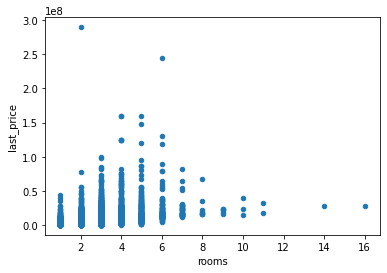

In [67]:
data_corr.plot.scatter(x='rooms', y='last_price');

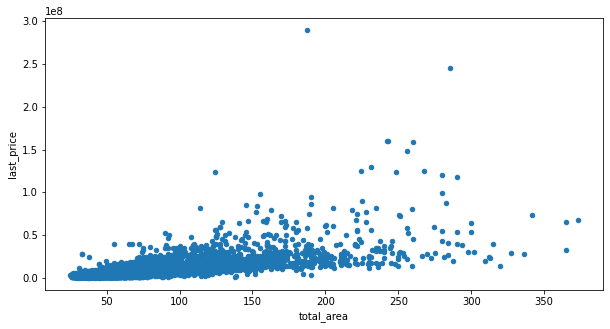

In [68]:
data_corr.plot.scatter(x='total_area', y='last_price', figsize=(10,5));

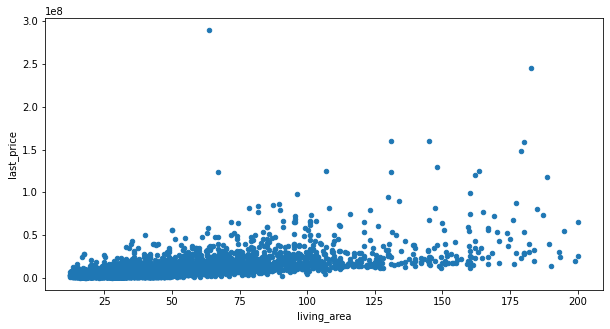

In [69]:
data_corr.plot.scatter(x='living_area', y='last_price', figsize=(10,5));

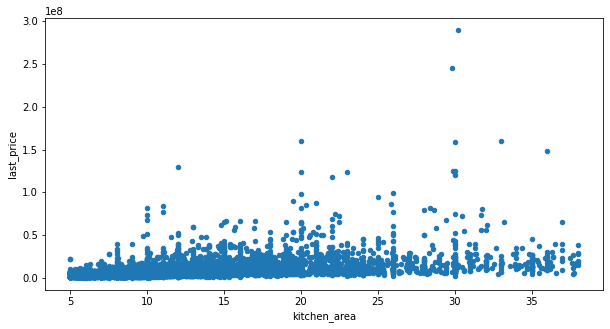

In [70]:
data_corr.plot.scatter(x='kitchen_area', y='last_price', figsize=(10,5));

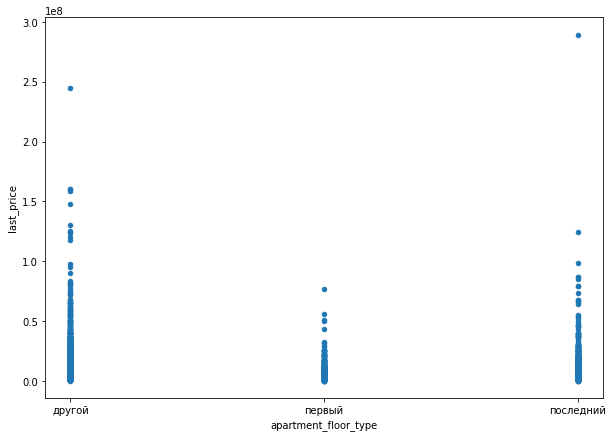

In [71]:
data_corr.plot.scatter(x='apartment_floor_type', y='last_price', figsize=(10,7));

Недвижимость на первых этажах обычно дешевле, чем недвижимость на последних и других этажах.

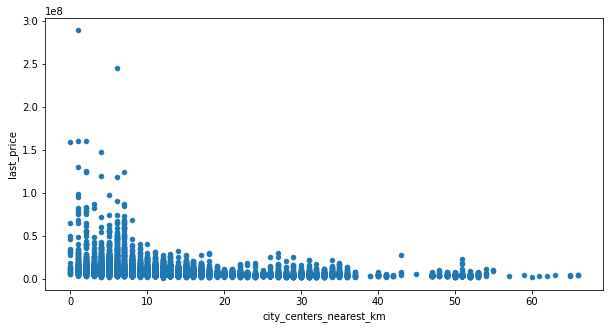

In [72]:
data_corr.plot.scatter(x='city_centers_nearest_km', y='last_price', figsize=(10,5));

In [78]:
data_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22531 entries, 0 to 23695
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   locality_name_strip      22531 non-null  object        
 1   last_price               22531 non-null  float64       
 2   rooms                    22531 non-null  int64         
 3   total_area               22531 non-null  float64       
 4   living_area              22531 non-null  float64       
 5   kitchen_area             22531 non-null  float64       
 6   floor                    22531 non-null  int64         
 7   apartment_floor_type     22531 non-null  object        
 8   city_centers_nearest_km  17410 non-null  float64       
 9   month_exposition         22531 non-null  datetime64[ns]
 10  day_of_week_exposition   22531 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(2)
memory usage: 2.1+ MB


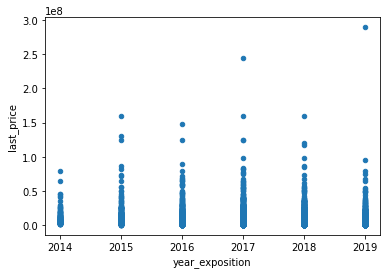

In [81]:
data_corr.plot.scatter(x='year_exposition', y='last_price');

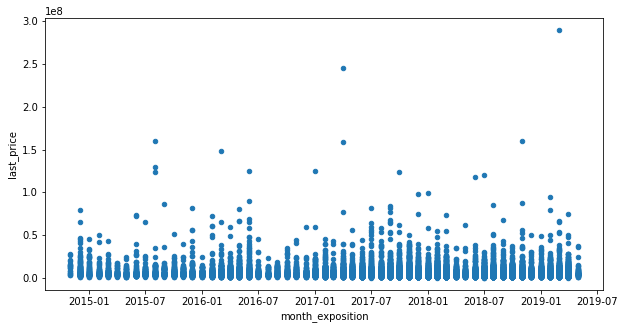

In [82]:
data_corr.plot.scatter(x='month_exposition', y='last_price', figsize=(10,5));

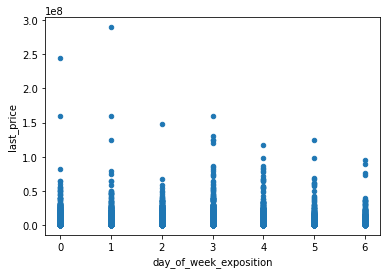

In [83]:
data_corr.plot.scatter(x='day_of_week_exposition', y='last_price');

В этом разделе мы изучили зависимость цены от значений:
- площади (общей, кухни, жилой);
- этажа, на котором размещена квартира;
- расстояния до центра города;
- времени размещения объявления: дня недели и месяца.

В большей степени на ценообразование влияет площадь квартиры (общая и жилая): чем больше площадь - тем выше цена. Площадь кухни, количества комнат и этаж в влияют на стоимость положительно, но в меньшей степени. Согласно данным, больше всего квартир продают на не первых и не последних этаж. По мере удаления от центра города стоимость квартиры уменьшается.
Стоимость квартиры от времени размещения (дня недели и месяца не зависит).

Мы имеем данные с января 2014 по январь 2019: в 2014 году продавали самую дешевую недвижимость (возможно, на это повлиял финансовый кризис), данные за 2019 - неполные. В период с 2015 по 2018 роста цен на недвижимость не наблюдается.

### Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра

In [84]:
# Выведем сводную таблицу
# Для удобства, переименуем столбцы
# Округлим значения до копеек
# Отсортируем по убыванию, оставим только 10 строк

data_median = data.pivot_table(index = 'locality_name_strip', values = 'price_per_square_meter', \
                               aggfunc=['count', 'median'])
data_median.columns = ['estate_count', 'price_median']
data_median['price_median'] = data_median['price_median'].round(2)
data_median = data_median.sort_values('estate_count', ascending = False).head(10)
data_median

,estate_count,price_median
locality_name_strip,,
Санкт-Петербург,15071,104081.63
Мурино,475,83010.34
Шушары,423,76125.00
Всеволожск,386,65789.47
Пушкин,351,99706.74
Колпино,334,74689.88
Парголово,312,91472.56
Гатчина,302,67925.85
Кудрово,265,91410.33


In [85]:
#Выведем максимальную цену за квадратный метр, округлим до копеек

data_median['price_median'].max()

104081.63

In [86]:
#Выведем минимальную цену за квадратный метр, округлим до копеек

data_median['price_median'].max().min()

104081.63

### Выделите квартиры в Санкт-Петербурге и вычислите среднюю цену каждого километра.

In [87]:
# Скопируем data_corr в data_spb

data_spb = data_corr.copy()

In [88]:
# Сделаме срез по Санкт-Петербургу

data_spb = data_spb.query('locality_name_strip=="Санкт-Петербург"')

In [89]:
# Добавим интересующую нас колонку

data_spb['price_per_km'] = data['last_price'] / data['city_centers_nearest_km']

In [90]:
data_spb_pivot_table = data_spb.pivot_table(index = 'city_centers_nearest_km', values = 'price_per_km')
#data_spb_pivot_table

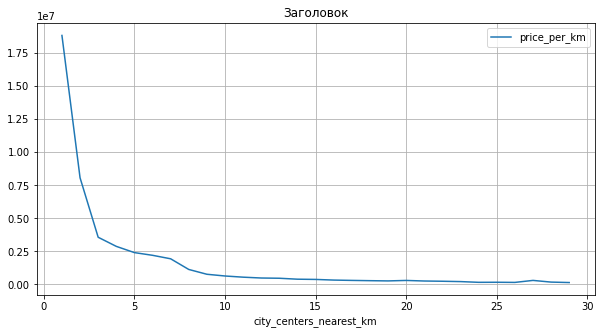

In [92]:
data_spb_pivot_table.plot(figsize=(10,5), grid = True, title = 'Заголовок');

Самая высокая цена - у недвижимости, расположенной на расстоянии до 3 км. Начиная с ~8 км, расстояние до центра не влияет на ценообразование.

### Общий вывод

Процесс исследования:
1. изучение общей информации, предобработка данных:
2. заполнение пропущенных значений, поиск и удаление аномалий в данных;
3. подсчет стоимости квадратного метра недвижимости;
4. исследовательский анализ данных и поиск закономерностей, влияющих на ценообразование;
5. изучение времени продажи квартир;
6. поиск населённых пунктов с самой высокой и низкой стоимостью квадратного метра;
7. поиск квартир в Санкт-Петербурге и вычисление средней цены каждого километра.

Мы выполнили предобработку данных, изучили их и нашли интересные особенности и зависимости, существующие на рынке недвижимости.

Перед проведением исследования были выдвинуты несколько гипотез:
* гипотеза № 1: существует взаимосвязь между ценой и общей площади недвижимости;
* гипотеза № 2: существует взаимосвязь между ценой и жилой площади недвижимости;
* гипотеза № 3: существует взаимосвязь между ценой недвижимости и количеством комнат;
* гипотеза № 4: существует взаимосвязь между ценой недвижимости и этажа, на котором расположена квартира (первый, последний, другой);
* гипотеза № 5: существует взаимосвязь между ценой недвижимости даты размещения (день недели, месяц, год).

**Гипотеза № 1** подтвердилась - с увеличением общей площади недвижимости увеличивается цена. 
В Санкт-Петербурге размещено больше всего объявлений о продаже и самая высокая средняя цена за квадратный метр - 113733.76.

**Гипотеза № 2** подтвердилась - с увеличением доли жилой площади растет и общая площадь недвижимости, а вместе с этим, растет и цена. Следовательно, гипотеза № 2 доплнительно подтвердает гипотезу № 1

**Гипотеза № 3** частично подтвердилась - с увеличением количества комнат цена недвижимости растет, но большее количество комнат не означает большая площадь недвижимости. Потенциальные покупатели больше обращают внимания на площадь, желая получить больше метров, а не больше комнат.

**Гипотеза № 4** частично подтвердилась - самая немногочисленная и недорогая недвижимость расположена на первых этажах. Популярностью так же не пользуются последние этаже - недвижимости в продаже немного. Самая дорогая и многочисленная недвижимость расположена на не последних и не первых этажах.
Было так же выдвинуто предположение, что с недвижимость на последних и первых этажах просто реже выставляется на продажу.

**Гипотеза № 5** не подтвердилась - взаимосвязь между ценой недвижимости и датой размещения не обнаружена.

Но была обнаружена другая взаимосвязь, связанная с датой: потенциальные продавцы чаще выставляют объявления в будние дни, чем в выходные. И ранее мы наблюдали волнообразный рост количества размещенной недвижимости в течение года: резкий рост и высокое удержание в холодные месяцы (февраль и март), резкий спад к маю (возможно, на это влияют майские праздники: у потенциальных продавцов появляются другие занятия). Далее мы видим постепенный рост к ноябрю и в декабре - снова провал (приближающийся новый год?).